<a href="https://colab.research.google.com/github/AbeRodz/online-payments-fraud-detection/blob/main/tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import BaseDecisionTree, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd drive/MyDrive/tp1/

/content/drive/MyDrive/tp1


In [ ]:
df_sample = pd.read_csv("./PS_20174392719_1491204439457_log.csv", engine= 'c')[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig",
        "oldbalanceDest", "newbalanceDest", "isFraud",
       "isFlaggedFraud"]]
df_sample = df_sample.sample(int(np.floor(6362619/10)))

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636261 entries, 4494229 to 1062263
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636261 non-null  int64  
 1   type            636261 non-null  object 
 2   amount          636261 non-null  float64
 3   oldbalanceOrg   636261 non-null  float64
 4   newbalanceOrig  636261 non-null  float64
 5   oldbalanceDest  636261 non-null  float64
 6   newbalanceDest  636261 non-null  float64
 7   isFraud         636261 non-null  int64  
 8   isFlaggedFraud  636261 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 48.5+ MB


# Dataset memory optimization

According to the following documentation from pandas
[Scaling to large datasets](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#load-less-data) there are various forms of reading huge datasets.

In this case two columns are not considered which gave a ram reduction of about 100mb, and the type is set as an object, according to the same reference, this can be transformed to a category datatype which reduced the memory by another 60mb

In [ ]:
#df['type']= df['type'].astype('category')
df_sample['type']= df_sample['type'].astype('category')

In [ ]:
#df[["step","isFraud","isFlaggedFraud"]] = df[["step","isFraud","isFlaggedFraud"]].apply(pd.to_numeric, downcast="unsigned")
df_sample[["step","isFraud","isFlaggedFraud"]] = df_sample[["step","isFraud","isFlaggedFraud"]].apply(pd.to_numeric, downcast="unsigned")

In [ ]:
#df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]] =df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].apply(pd.to_numeric, downcast="float")
df_sample[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]] =df_sample[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].apply(pd.to_numeric, downcast="float")

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636261 entries, 4494229 to 1062263
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   step            636261 non-null  uint16  
 1   type            636261 non-null  category
 2   amount          636261 non-null  float64 
 3   oldbalanceOrg   636261 non-null  float64 
 4   newbalanceOrig  636261 non-null  float64 
 5   oldbalanceDest  636261 non-null  float64 
 6   newbalanceDest  636261 non-null  float64 
 7   isFraud         636261 non-null  uint8   
 8   isFlaggedFraud  636261 non-null  uint8   
dtypes: category(1), float64(5), uint16(1), uint8(2)
memory usage: 32.2 MB


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df_sample.memory_usage(deep=True)

Index             5090088
step              1272522
type               636753
amount            5090088
oldbalanceOrg     5090088
newbalanceOrig    5090088
oldbalanceDest    5090088
newbalanceDest    5090088
isFraud            636261
isFlaggedFraud     636261
dtype: int64

In [ ]:
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636261.000000,6.362610e+05,6.362610e+05,6.362610e+05,6.362610e+05,6.362610e+05,636261.000000,636261.000000
mean,243.375524,1.799475e+05,8.333277e+05,8.543390e+05,1.102947e+06,1.226257e+06,0.001292,0.000002
std,142.146485,6.140972e+05,2.888912e+06,2.924776e+06,3.405277e+06,3.672797e+06,0.035920,0.001254
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.340300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.512289e+04,1.424600e+04,0.000000e+00,1.323090e+05,2.151522e+05,0.000000,0.000000
75%,335.000000,2.090679e+05,1.074290e+05,1.436557e+05,9.441250e+05,1.115373e+06,0.000000,0.000000
max,742.000000,5.831837e+07,4.368662e+07,4.367380e+07,3.553814e+08,3.551855e+08,1.000000,1.000000


# Utility functions

In [ ]:
def get_feature_info(df:pd.DataFrame, col_name:str,show_counts = False):
    counts = pd.Series(df[col_name].value_counts(),name=f'{col_name} Count')
    percentages = pd.Series(counts/len(df)*100,name=f'{col_name} %')

    if show_counts:
        series = pd.concat([percentages,counts], axis = 1)
        return series
    
    return percentages

In [ ]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=8, ylabelsize=8,figsize=(18,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [ ]:
def get_importances(model,target:str):
  importances = list(model.feature_importances_)# List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_sample.drop([target], axis = 1), importances)]# Sort the feature importances by most important first
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
  return (feature_importances,importances)

In [ ]:
def plot_importance(df, importances):
  # lista de ubicaciones x para el gráfico
  x_values = list(range(len(importances)))

  # Hacer un gráfico de barras
  plt.bar(x_values, importances, orientation = 'vertical')

  # Etiquetas para el eje x
  plt.xticks(x_values, list(df.drop('isFraud',axis= 1).columns), rotation='vertical')

  # Etiquetas y título de los ejes
  plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title(' Importancia de las variables')

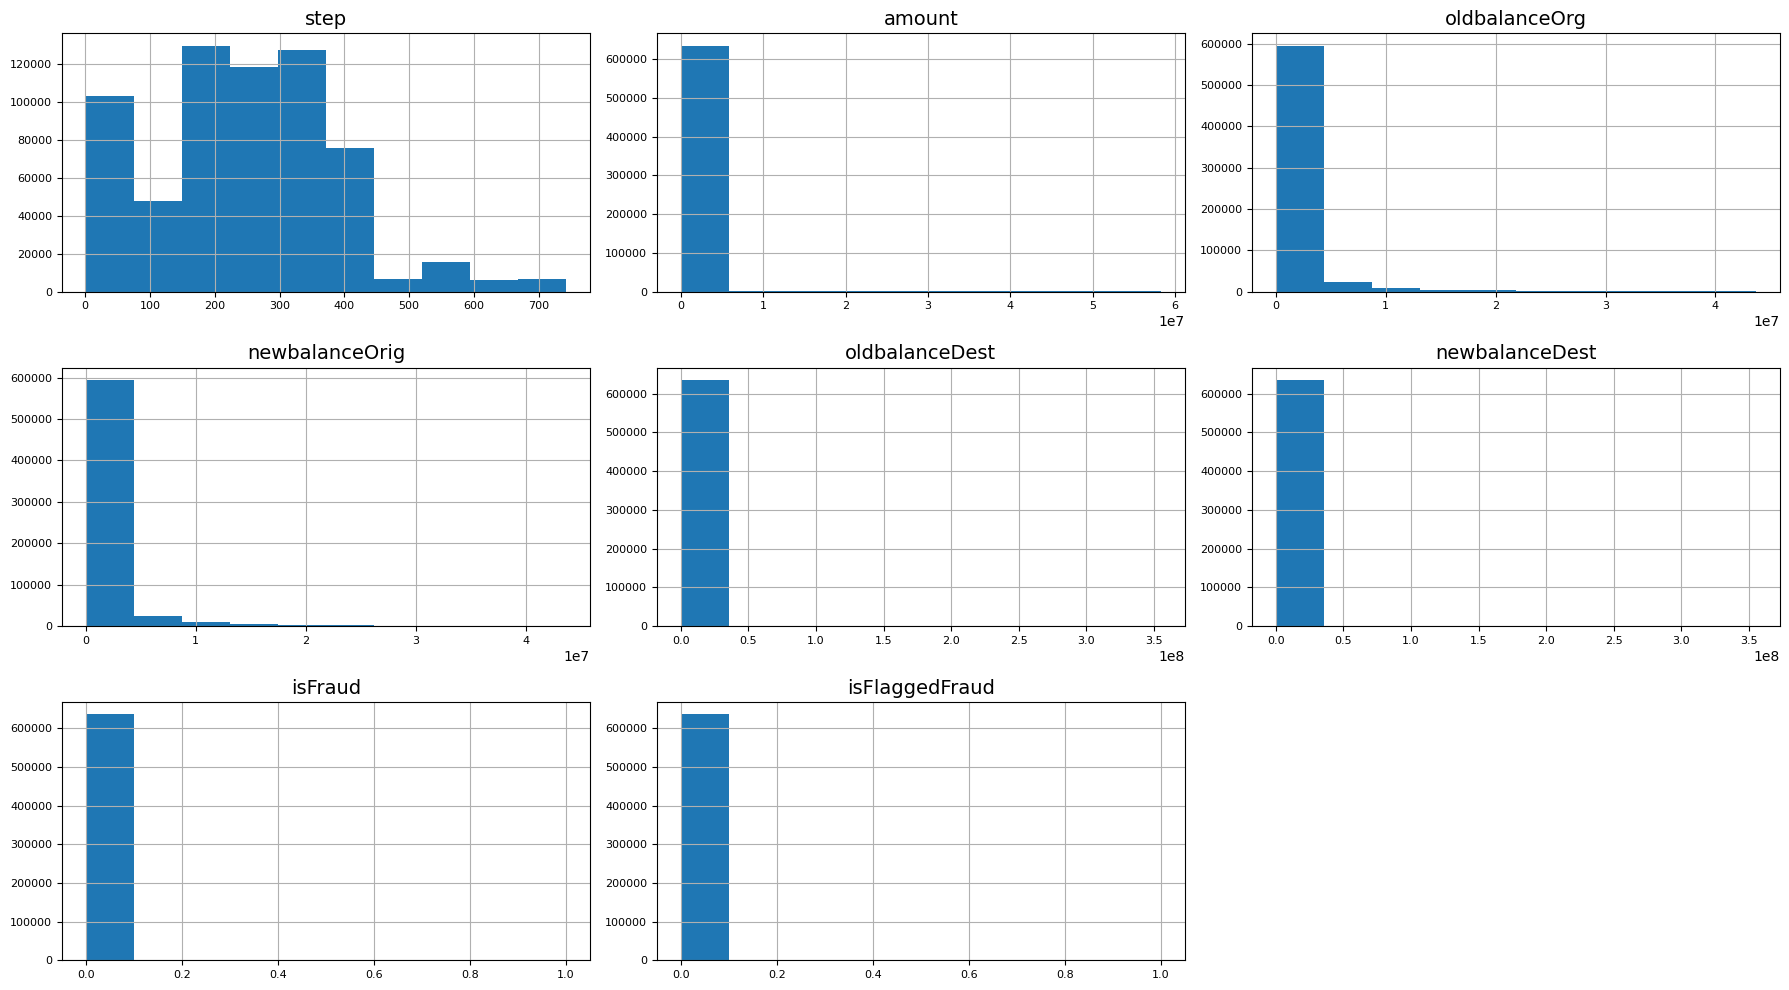

In [ ]:
display_dataset_distributions(df_sample)

# Dataset exploration 

In [ ]:
is_fraud_info = get_feature_info(df_sample, 'isFraud', show_counts=True)
print(is_fraud_info)

   isFraud %  isFraud Count
0  99.870808         635439
1   0.129192            822


In [ ]:
is_fraud_info = get_feature_info(df_sample, 'isFraud', show_counts=True)
print(is_fraud_info)

   isFraud %  isFraud Count
0  99.870808         635439
1   0.129192            822


In [ ]:
df_sample.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Fraud imbalance

The percentages above indicate that frauds are not that common on this specific dataset, which is positive for the company, but not that much for training a model to detect those frauds, as there is a huge imbalance in the dataset.

In [ ]:
df_sample['amount'].describe()

count    6.362610e+05
mean     1.799475e+05
std      6.140972e+05
min      0.000000e+00
25%      1.340300e+04
50%      7.512289e+04
75%      2.090679e+05
max      5.831837e+07
Name: amount, dtype: float64

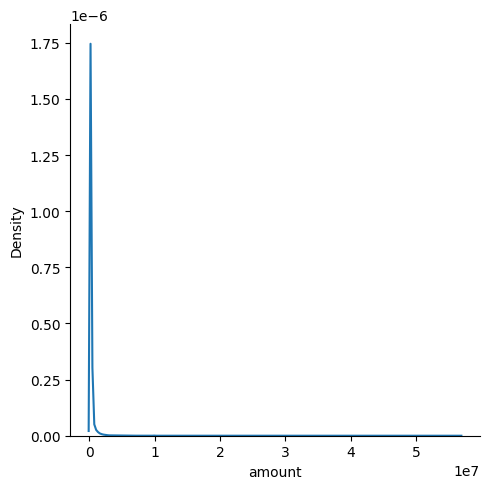

In [ ]:
sns.displot(data=df_sample,x ='amount', kind='kde')

In [ ]:
df_sample.type.unique()

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN', 'DEBIT']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
df_sample[df_sample.type == 'PAYMENT']['isFraud'].sum()

0

In [ ]:
df_sample.dtypes

step                uint16
type              category
amount             float64
oldbalanceOrg      float64
newbalanceOrig     float64
oldbalanceDest     float64
newbalanceDest     float64
isFraud              uint8
isFlaggedFraud       uint8
dtype: object

<ipython-input-33-a414119f7b6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_sample.corr(method = 'spearman').round(2)


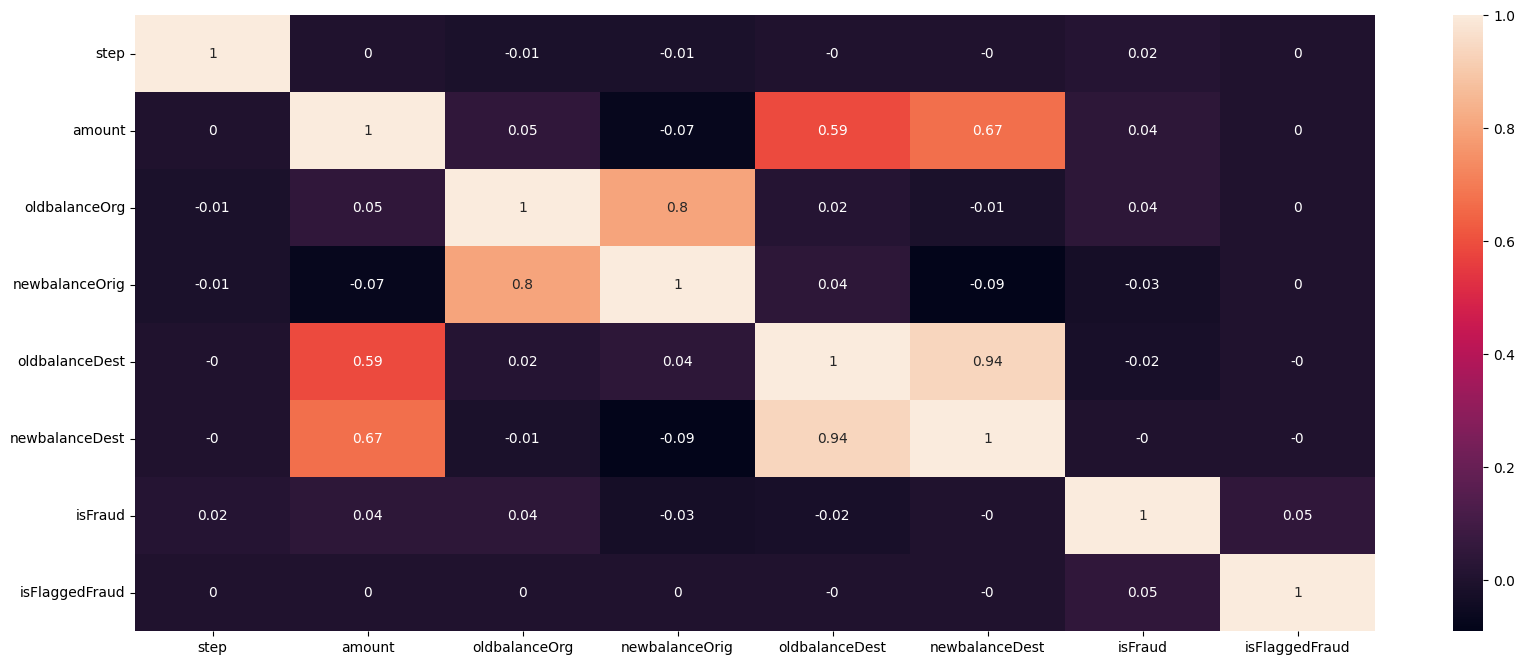

In [ ]:
correlation_matrix = df_sample.corr(method = 'spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

In [ ]:
correlation_matrix['isFraud'].sort_values(ascending= False)

isFraud           1.00
isFlaggedFraud    0.05
amount            0.04
oldbalanceOrg     0.04
step              0.02
newbalanceDest   -0.00
oldbalanceDest   -0.02
newbalanceOrig   -0.03
Name: isFraud, dtype: float64

# Distribucion de steps

In [ ]:
df_sample['step'].value_counts()

19     5149
18     4930
187    4785
307    4730
235    4706
       ... 
682       1
678       1
243       1
344       1
421       1
Name: step, Length: 634, dtype: int64

La mas frecuente es que se realicen 19 steps

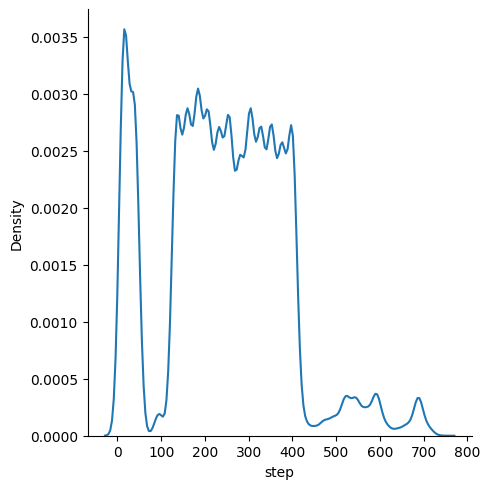

In [ ]:
sns.displot(data=df_sample, x='step', kind='kde')

In [ ]:
df_sample['type'].unique()

['PAYMENT', 'CASH_IN', 'CASH_OUT', 'TRANSFER', 'DEBIT']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [ ]:
#df_sample['type'] = df_sample['type'].map({'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5  })

<Axes: xlabel='type', ylabel='Percent'>

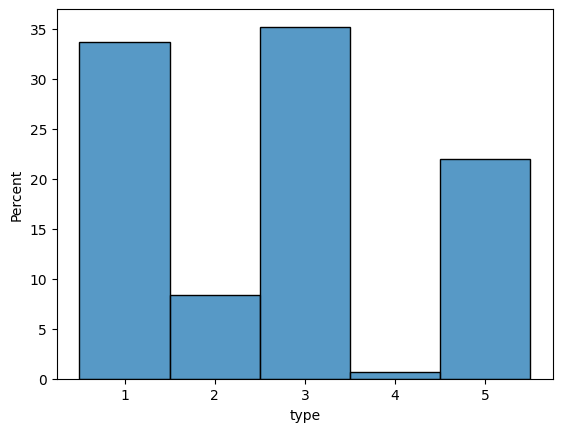

In [ ]:
sns.histplot(data=df_sample, x='type', stat="percent", discrete=True)

In [ ]:
df_fraud = df_sample[df_sample['isFraud']==1]
df_no_fraud = df_sample[df_sample['isFraud']==0]

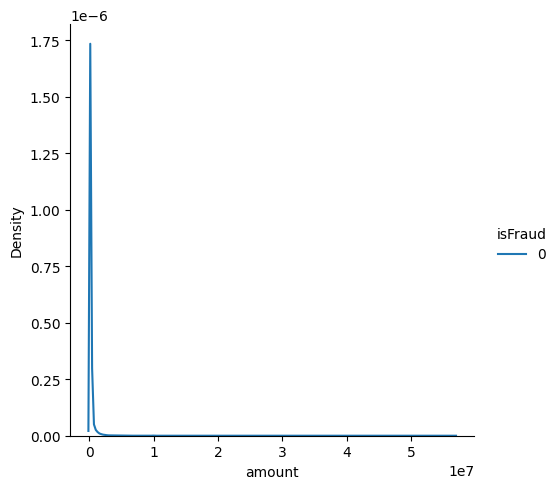

In [ ]:
sns.displot(data = df_no_fraud ,x= df_no_fraud["amount"], kind= 'kde', hue="isFraud")

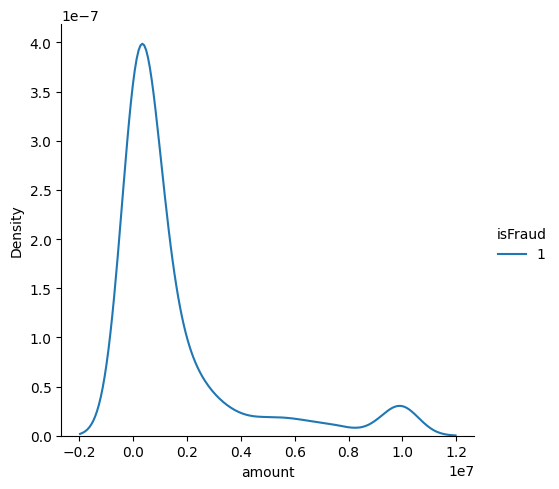

In [ ]:
sns.displot(data = df_fraud ,x= df_fraud["amount"], kind= 'kde', hue="isFraud")

In [ ]:
df_sample.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1889514,164,1,495.01,20324.00,19828.99,0.00,0.00,0,0
1557657,154,2,1034651.25,43744.63,0.00,1504179.59,2538830.85,0,0
3909044,284,1,1556.56,0.00,0.00,0.00,0.00,0,0
2970439,231,3,17748.35,0.00,0.00,548636.06,566384.40,0,0
720553,37,3,188834.13,7317.00,0.00,0.00,188834.13,0,0


<Axes: xlabel='step', ylabel='amount'>

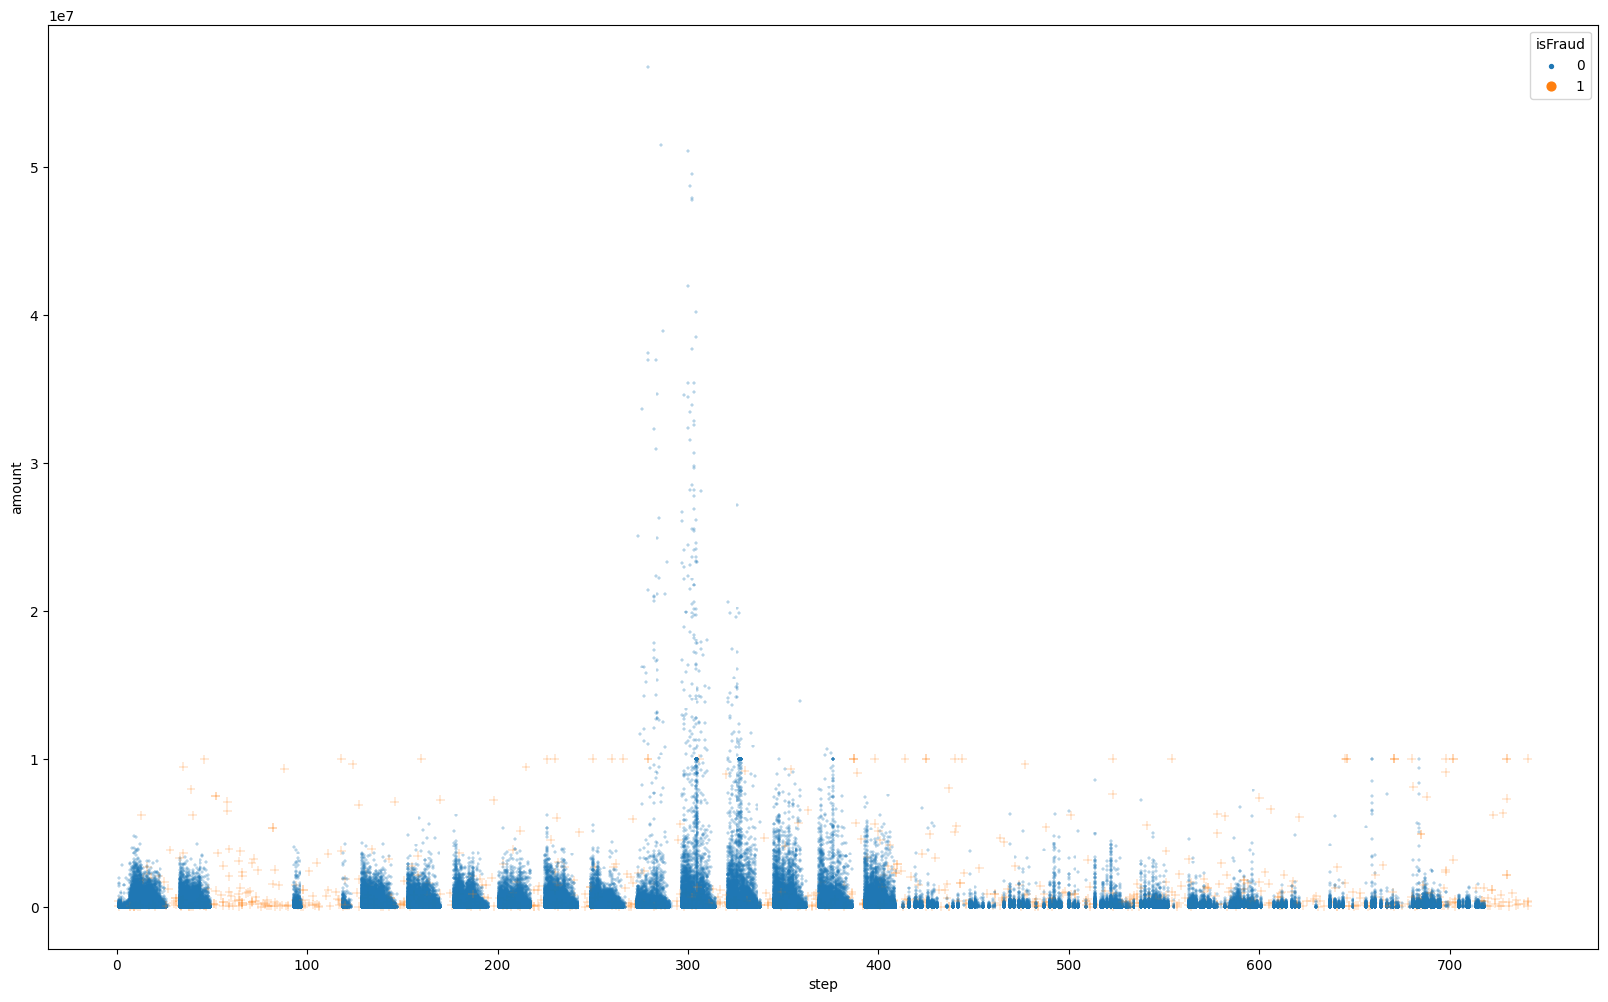

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=df_sample["step"], y=df_sample["amount"], hue=df_sample["isFraud"], size=df_sample["isFraud"],sizes=(40, 8), marker="+")

In [ ]:
df_sample['type'] = df_sample['type'].astype('int32')

In [ ]:
df_sample.dtypes

step               uint16
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             uint8
isFlaggedFraud      uint8
dtype: object

In [ ]:
df_sample = pd.get_dummies(df_sample,drop_first= True)

In [ ]:
df_sample.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4494229,325,21367.59,249385.00,228017.41,0.00,0.00,0,0,0,0,1,0
2976896,231,259577.11,9012.00,0.00,0.00,259577.11,0,0,1,0,0,0
6200422,576,84985.24,4590112.19,4675097.43,172420.77,87435.52,0,0,0,0,0,0
254712,14,6304.54,0.00,0.00,0.00,0.00,0,0,0,0,1,0
4252561,306,431798.99,202342.00,0.00,43605.14,475404.13,0,0,1,0,0,0


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(['isFraud'], axis = 1), df_sample.isFraud, stratify= df_sample.isFraud)

In [ ]:
X_train.shape

(477195, 11)

In [ ]:
X_test.shape

(159066, 11)

In [ ]:
def get_metrics(ground_truth : list,predictions:list):
    print(classification_report(ground_truth,predictions))
    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(ground_truth,predictions),4))
    
    precision, recall,threshold=precision_recall_curve(ground_truth,predictions);

    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print('Matriz de confusion')
    print(confusion_matrix(ground_truth, predictions))
    return
    

In [ ]:
def set_logistic_regression(X_train_sc,X_test_sc,y_train,y_test):
    import numpy as np
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)

    return model

In [ ]:
def logistic_metrics(model, X_test_sc, y_test):
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)

    get_metrics(y_test,y_pred)
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues');
    return y_pred

In [ ]:
def scale_set(X_train, X_test):
  scaler=StandardScaler()  

  X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
  X_test_sc=scaler.transform(X_test)
  return (X_train_sc, X_test_sc)

## Logistic Regression con imbalance de clases

In [ ]:
(X_train_sc, X_test_sc) = scale_set(X_train, X_test)

In [ ]:
logistic_imbalance = set_logistic_regression(X_train_sc, X_test_sc, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158860
           1       0.97      0.56      0.71       206

    accuracy                           1.00    159066
   macro avg       0.98      0.78      0.85    159066
weighted avg       1.00      1.00      1.00    159066

Area bajo la curva ROC: 0.7791
Area bajo la curva Precision-Recall: 0.7626
Matriz de confusion
[[158856      4]
 [    91    115]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


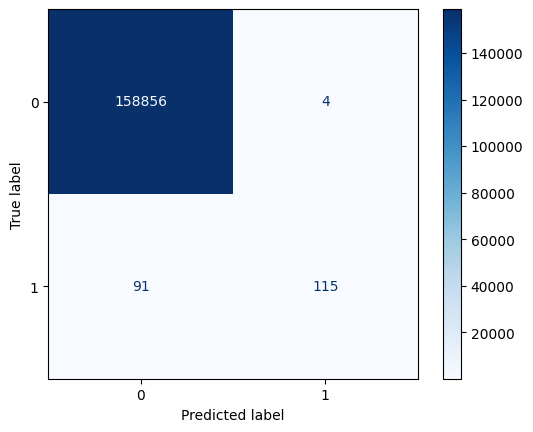

In [ ]:
logistic_imbalance_prediction = logistic_metrics(logistic_imbalance, X_test_sc, y_test)

Regression logistica con dataset imbalanceado, nos devuelve un mal performance con respecto a la deteccion de fraudes, en testing, la deteccion es practicamente igual a decir 50/50 sobre los fraudes

## Logistic Regression con UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler=RandomUnderSampler(sampling_strategy='majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train_sc,y_train);
#(X_train_sc, X_test_sc) = scale_set(X_train, X_test)

In [ ]:
logistic_undersample = set_logistic_regression(X_train_us, X_test_sc, y_train_us, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    158860
           1       0.03      0.99      0.05       206

    accuracy                           0.95    159066
   macro avg       0.51      0.97      0.51    159066
weighted avg       1.00      0.95      0.97    159066

Area bajo la curva ROC: 0.9714
Area bajo la curva Precision-Recall: 0.5083
Matriz de confusion
[[151315   7545]
 [     2    204]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


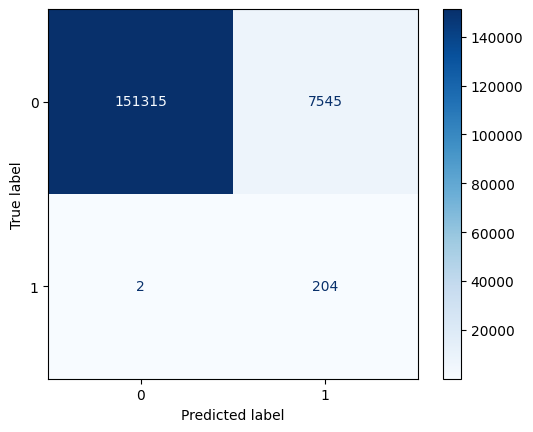

In [ ]:
logistic_undersample_prediction = logistic_metrics(logistic_undersample, X_test_sc, y_test)

In [ ]:
print('Composición del training set:')
print(y_train_us.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    616
1    616
Name: isFraud, dtype: int64

Composición del test set:
0    158860
1       206
Name: isFraud, dtype: int64


Regresion logistica con undersampling, mejora considerablemente la deteccion de fraudes, sin embargo, ocurren falsos positivos en el set de no fraudes, introduciendo error al sistema

## Logistic Regression con OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train_sc,y_train);

In [ ]:
print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
0    476561
1    476561
Name: isFraud, dtype: int64

Composición del test set:
0    158855
1       211
Name: isFraud, dtype: int64


In [ ]:
logistic_oversample = set_logistic_regression(X_train_os, X_test_sc, y_train_os, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    158860
           1       0.03      0.99      0.06       206

    accuracy                           0.96    159066
   macro avg       0.52      0.97      0.52    159066
weighted avg       1.00      0.96      0.98    159066

Area bajo la curva ROC: 0.9742
Area bajo la curva Precision-Recall: 0.5094
Matriz de confusion
[[152969   5891]
 [     3    203]]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


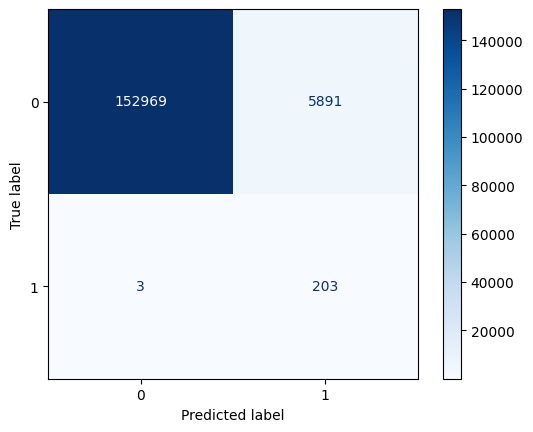

In [ ]:
logistic_oversample_prediction = logistic_metrics(logistic_oversample, X_test_sc, y_test)

Oversampling no cambio mucho el resultado contra undersampling, aunque sigue siendo mejor que en crudo

## Probando con trees

In [ ]:
from sklearn.tree import *
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
def setTree(max_depth,x_train,y_train):
  model = DecisionTreeClassifier(max_depth = max_depth, criterion='entropy')
  model.fit(x_train,y_train)
  print("Tree depth",model.get_depth())
  return model

Decision Tree con data imbalanceada

In [ ]:
model_raw = setTree(4,X_train,y_train)

Tree depth 4


Decision Tree con data undersampleada

In [ ]:
model_us = setTree(4,X_train_us,y_train_us)

Tree depth 4


Decision Tree con data oversampleada

In [ ]:
model_os = setTree(4,X_train_os,y_train_os)

Tree depth 4


[Text(0.5, 0.9, 'X[1] <= 723776.0\nentropy = 0.014\nsamples = 477195\nvalue = [476579, 616]'),
 Text(0.29411764705882354, 0.7, 'X[10] <= 0.5\nentropy = 0.009\nsamples = 462598\nvalue = [462246, 352]'),
 Text(0.11764705882352941, 0.5, 'X[7] <= 0.5\nentropy = 0.005\nsamples = 436800\nvalue = [436619, 181]'),
 Text(0.058823529411764705, 0.3, 'entropy = 0.0\nsamples = 269012\nvalue = [269012, 0]'),
 Text(0.17647058823529413, 0.3, 'X[2] <= 58056.871\nentropy = 0.012\nsamples = 167788\nvalue = [167607, 181]'),
 Text(0.11764705882352941, 0.1, 'entropy = 0.004\nsamples = 138949\nvalue = [138905, 44]'),
 Text(0.23529411764705882, 0.1, 'entropy = 0.044\nsamples = 28839\nvalue = [28702, 137]'),
 Text(0.47058823529411764, 0.5, 'X[5] <= 161.245\nentropy = 0.058\nsamples = 25798\nvalue = [25627, 171]'),
 Text(0.4117647058823529, 0.3, 'X[4] <= 311.5\nentropy = 0.887\nsamples = 246\nvalue = [75, 171]'),
 Text(0.35294117647058826, 0.1, 'entropy = 0.214\nsamples = 177\nvalue = [6, 171]'),
 Text(0.470588

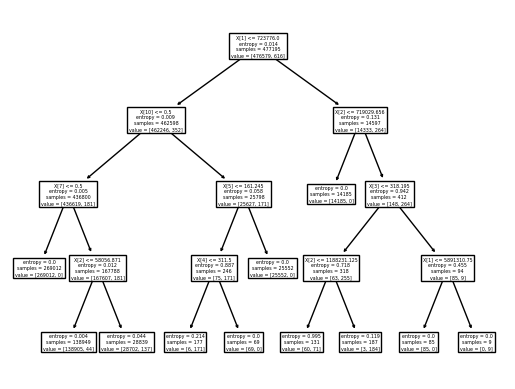

In [ ]:
plot_tree(model_raw)

[Text(0.4880952380952381, 0.9, 'X[2] <= -0.273\nentropy = 1.0\nsamples = 1232\nvalue = [616, 616]'),
 Text(0.23809523809523808, 0.7, 'X[1] <= -0.231\nentropy = 0.605\nsamples = 473\nvalue = [403, 70]'),
 Text(0.14285714285714285, 0.5, 'X[9] <= 0.344\nentropy = 0.858\nsamples = 245\nvalue = [176, 69]'),
 Text(0.09523809523809523, 0.3, 'X[2] <= -0.288\nentropy = 0.824\nsamples = 93\nvalue = [24, 69]'),
 Text(0.047619047619047616, 0.1, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.582\nsamples = 79\nvalue = [11, 68]'),
 Text(0.19047619047619047, 0.3, 'entropy = 0.0\nsamples = 152\nvalue = [152, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -1.448\nentropy = 0.041\nsamples = 228\nvalue = [227, 1]'),
 Text(0.2857142857142857, 0.3, 'X[0] <= -1.458\nentropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.23809523809523808, 0.1, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 1.0\nsamples = 2\nvalue =

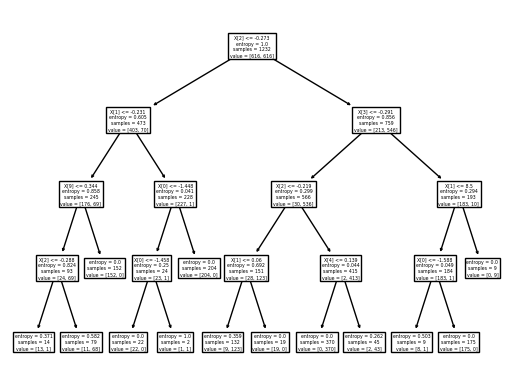

In [ ]:
plot_tree(model_us)

[Text(0.4880952380952381, 0.9, 'X[2] <= -0.268\nentropy = 1.0\nsamples = 953158\nvalue = [476579, 476579]'),
 Text(0.23809523809523808, 0.7, 'X[1] <= -0.209\nentropy = 0.661\nsamples = 392063\nvalue = [324804, 67259]'),
 Text(0.14285714285714285, 0.5, 'X[9] <= 0.344\nentropy = 0.885\nsamples = 219650\nvalue = [153154, 66496]'),
 Text(0.09523809523809523, 0.3, 'X[2] <= -0.288\nentropy = 0.933\nsamples = 102175\nvalue = [35679, 66496]'),
 Text(0.047619047619047616, 0.1, 'entropy = 0.252\nsamples = 18195\nvalue = [17428, 767]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.755\nsamples = 83980\nvalue = [18251, 65729]'),
 Text(0.19047619047619047, 0.3, 'entropy = 0.0\nsamples = 117475\nvalue = [117475, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= -1.448\nentropy = 0.041\nsamples = 172413\nvalue = [171650, 763]'),
 Text(0.2857142857142857, 0.3, 'X[0] <= -1.455\nentropy = 0.229\nsamples = 20511\nvalue = [19748, 763]'),
 Text(0.23809523809523808, 0.1, 'entropy = 0.0\nsamples = 18788\nvalue =

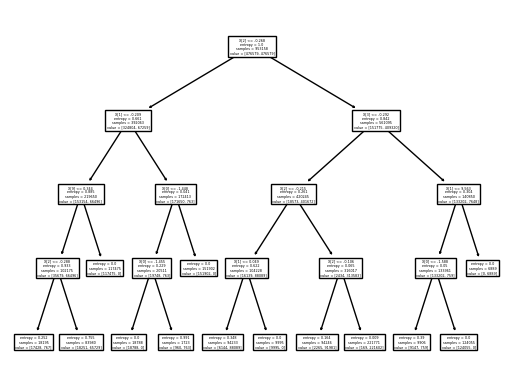

In [ ]:
plot_tree(model_os)

In [ ]:
predicted_values_raw = model_raw.predict(X_test_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predicted_values_under_sample = model_us.predict(X_test_sc)

In [ ]:
predicted_values_over_sample = model_os.predict(X_test_sc)

In [ ]:
def get_precision_acc(predicted, label,y_test= y_test):
  print(label)
  print("precision: ", accuracy_score(y_test, predicted))
  print("recall: ", recall_score(y_test, predicted))

In [ ]:
get_precision_acc(predicted_values_raw, "imbalanced")

imbalanced
precision:  0.9161920209221329
recall:  0.5388349514563107


In [ ]:
get_precision_acc(predicted_values_under_sample, "undersampled")

undersampled
precision:  0.9441301095142897
recall:  0.9951456310679612


In [ ]:
get_precision_acc(predicted_values_over_sample, "oversampled")

oversampled
precision:  0.9429544968755108
recall:  0.9854368932038835


## Metricas de decision Tree con data imbalanceada

In [ ]:
get_precision_acc(predicted_values_raw, "imbalanced")

imbalanced
precision:  0.9161920209221329
recall:  0.5388349514563107


In [ ]:
get_metrics(y_test, predicted_values_raw)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    158860
           1       0.01      0.54      0.02       206

    accuracy                           0.92    159066
   macro avg       0.50      0.73      0.49    159066
weighted avg       1.00      0.92      0.96    159066

Area bajo la curva ROC: 0.7278
Area bajo la curva Precision-Recall: 0.2739
Matriz de confusion
[[145624  13236]
 [    95    111]]


## Metricas de decision Tree con data undersampleada

In [ ]:
get_precision_acc(predicted_values_under_sample, "undersample")

undersample
precision:  0.9441301095142897
recall:  0.9951456310679612


In [ ]:
get_metrics(y_test, predicted_values_under_sample)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    158860
           1       0.02      1.00      0.04       206

    accuracy                           0.94    159066
   macro avg       0.51      0.97      0.51    159066
weighted avg       1.00      0.94      0.97    159066

Area bajo la curva ROC: 0.9696
Area bajo la curva Precision-Recall: 0.5089
Matriz de confusion
[[149974   8886]
 [     1    205]]


## Metricas de decision Tree con data oversampleada

In [ ]:
get_precision_acc(predicted_values_under_sample, "oversample")

oversample
precision:  0.9441301095142897
recall:  0.9951456310679612


In [ ]:
get_metrics(y_test, predicted_values_over_sample)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    158860
           1       0.02      0.99      0.04       206

    accuracy                           0.94    159066
   macro avg       0.51      0.96      0.51    159066
weighted avg       1.00      0.94      0.97    159066

Area bajo la curva ROC: 0.9642
Area bajo la curva Precision-Recall: 0.5037
Matriz de confusion
[[149789   9071]
 [     3    203]]


Notese que el Decision tree tambien se es afectado por la data imbalanceada, al realizar undersampling, detecto muy bien la mayoria de fraudes, esto implica que el recall es de muy alto, sin embargo introduce errores en la clase de no fraudes.

Por otro lado la data oversampleada, genera 97% de recall, y una diferencia de falsos positivos menor contra undersample, por lo tanto oversample es mejor con decision trees

Decision Tree con la data imbalanceada, genera un resultado mejor que regresion logistica, sin embargo aun tenemos una gran cantidad de verdaderos negativos

## visualizando las varialbes importantes para los trees

In [ ]:
model_list = [{"name":"Raw","model":model_raw},
              {"name":"Undersample","model":model_us},
              {"name":"Oversample","model":model_os}
              ]
for m in range(len(model_list)):
  (feature_importances_tree,importances_tree) = get_importances(model_list[m]['model'], 'isFraud')
  print("\n",model_list[m]['name'])
  print("---------------------","\n")
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_tree];
  


 Raw
--------------------- 

Variable: oldbalanceOrg        Importance: 0.38
Variable: newbalanceDest       Importance: 0.26
Variable: amount               Importance: 0.16
Variable: type_TRANSFER        Importance: 0.08
Variable: type_CASH_OUT        Importance: 0.05
Variable: oldbalanceDest       Importance: 0.04
Variable: newbalanceOrig       Importance: 0.02
Variable: step                 Importance: 0.0
Variable: isFlaggedFraud       Importance: 0.0
Variable: type_DEBIT           Importance: 0.0
Variable: type_PAYMENT         Importance: 0.0

 Undersample
--------------------- 

Variable: newbalanceOrig       Importance: 0.38
Variable: oldbalanceOrg        Importance: 0.33
Variable: amount               Importance: 0.15
Variable: type_PAYMENT         Importance: 0.12
Variable: step                 Importance: 0.01
Variable: oldbalanceDest       Importance: 0.01
Variable: newbalanceDest       Importance: 0.0
Variable: isFlaggedFraud       Importance: 0.0
Variable: type_CASH_OUT   

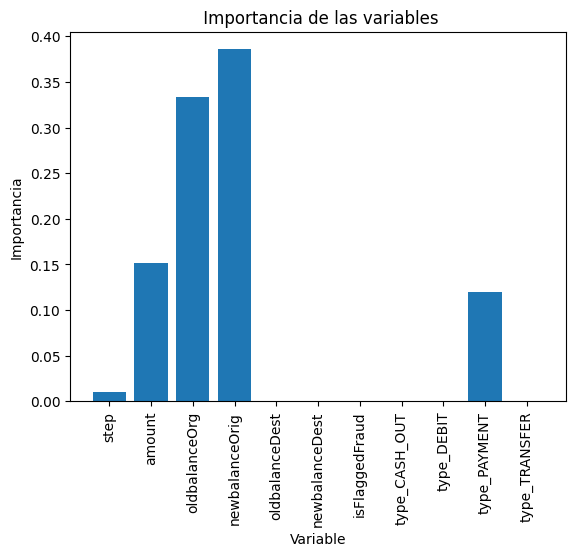

In [ ]:
plot_importance(df_sample, importances_tree)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def setForest(x_train,y_train):
  model = RandomForestRegressor(n_estimators = 100, random_state = 23, n_jobs = -1)
  model.fit(x_train,y_train)
  
  return model

In [ ]:
forest_raw = setForest(X_train_sc,y_train)

In [ ]:
forest_undersample = setForest(X_train_us,y_train_us)

In [ ]:
forest_overrsample = setForest(X_train_os,y_train_os )

In [ ]:
forest_prediction_raw = forest_raw.predict(X_test_sc)

In [ ]:
get_precision_acc( forest_prediction_raw.astype(np.uint8), "imbalanced")

imbalanced
precision:  0.9994907774131493
recall:  0.6116504854368932


In [ ]:
get_metrics(y_test, forest_prediction_raw.astype(np.uint8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158860
           1       0.99      0.61      0.76       206

    accuracy                           1.00    159066
   macro avg       1.00      0.81      0.88    159066
weighted avg       1.00      1.00      1.00    159066

Area bajo la curva ROC: 0.8058
Area bajo la curva Precision-Recall: 0.8021
Matriz de confusion
[[158859      1]
 [    80    126]]


In [ ]:
forest_prediction_undersample = forest_undersample.predict(X_test_sc)

In [ ]:
get_precision_acc( forest_prediction_undersample.astype(np.uint8), "undersample")

undersample
precision:  0.9977933687903134
recall:  0.7038834951456311


In [ ]:
get_metrics(y_test, forest_prediction_undersample.astype(np.uint8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158860
           1       0.33      0.70      0.45       206

    accuracy                           1.00    159066
   macro avg       0.67      0.85      0.73    159066
weighted avg       1.00      1.00      1.00    159066

Area bajo la curva ROC: 0.851
Area bajo la curva Precision-Recall: 0.5188
Matriz de confusion
[[158570    290]
 [    61    145]]


In [ ]:
forest_prediction_oversample = forest_overrsample.predict(X_test_sc)

In [ ]:
get_precision_acc( forest_prediction_oversample.astype(np.uint8), "overrsample")

overrsample
precision:  0.9994279104271183
recall:  0.5679611650485437


In [ ]:
get_metrics(y_test, forest_prediction_oversample.astype(np.uint8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158860
           1       0.98      0.57      0.72       206

    accuracy                           1.00    159066
   macro avg       0.99      0.78      0.86    159066
weighted avg       1.00      1.00      1.00    159066

Area bajo la curva ROC: 0.784
Area bajo la curva Precision-Recall: 0.7759
Matriz de confusion
[[158858      2]
 [    89    117]]


Utilizando random Forest, de la misma manera que los modelos anteriores, es afectado por el imbalance, sin embargo al aplicar under y overfitting, se obtienen mejores resultados, sin embargo son similares al de Decision tree con data imbalanceada.

Notese que oversampling, reduce considerablemente los falsos positivos, pero undersampling el recall

In [ ]:
amount = X_test['amount']

In [ ]:
amount

6056133      9175.24
4337044     32350.41
5819833    132764.08
2085674      6822.83
2274869    136621.72
             ...    
15279       40552.03
12826        6537.13
4053242    120446.33
572297     327331.61
6013782      5659.43
Name: amount, Length: 159066, dtype: float64

# Antes de decidir el modelo que maximiza las ganancias, veamos el porcentaje de perdidas que cada modelo obtiene

In [ ]:
def get_recall(amount, y_test,predictions, multiplier =1):
  false_losses = ((~y_test & predictions.astype(np.uint8))).sum()
  avoided_loses = (((y_test & predictions.astype(np.uint8)))*multiplier).sum()
  real_losses = ((y_test & ~predictions.astype(np.uint8))).sum()
  return (avoided_loses)/(avoided_loses +real_losses)

## regresion logistica

In [ ]:
predictions = [{"model" :"logistic_imbalance","prediction":logistic_imbalance_prediction},
               {"model" :"logistic_undersample","prediction":logistic_undersample_prediction},
               {"model" :"logistic_oversample","prediction":logistic_oversample_prediction},
               {"model" :"tree_imbalance","prediction":predicted_values_raw}, 
               {"model" :"tree_undersample","prediction":predicted_values_under_sample}, 
               {"model" :"tree_oversample","prediction":predicted_values_over_sample },
               {"model" :"forest_imbalance","prediction":forest_prediction_raw.astype(np.uint8)},
                
               {"model" :"forest_undersample","prediction":forest_prediction_undersample.astype(np.uint8)}, 
               {"model" :"forest_oversample","prediction":forest_prediction_oversample.astype(np.uint8)}
               ]

Resumen de las perdidas

In [ ]:
recalls = [{x['model']:np.round(get_recall(amount, y_test,x['prediction']),2)} for x in predictions ]

recalls_real corresponde a contemplar el porcentaje de ganancia (0.2) de cada transaccion legitima

In [ ]:
recalls_real = [{x['model']:np.round(get_recall(amount, y_test,x['prediction'], 0.2),2)} for x in predictions ]

In [ ]:
recalls

[{'logistic_imbalance': 0.56},
 {'logistic_undersample': 0.99},
 {'logistic_oversample': 0.99},
 {'tree_imbalance': 0.54},
 {'tree_undersample': 1.0},
 {'tree_oversample': 0.99},
 {'forest_imbalance': 0.61},
 {'forest_undersample': 0.7},
 {'forest_oversample': 0.57}]

In [ ]:
recalls_real

[{'logistic_imbalance': 0.2},
 {'logistic_undersample': 0.95},
 {'logistic_oversample': 0.93},
 {'tree_imbalance': 0.19},
 {'tree_undersample': 0.98},
 {'tree_oversample': 0.93},
 {'forest_imbalance': 0.24},
 {'forest_undersample': 0.32},
 {'forest_oversample': 0.21}]

# Resultados

Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un
20%, y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
Realizar un análisis y determinar un modelo que permita maximizar la ganancia de la
empresa.

En el trabajo práctico de fraude, el recall sería el porcentaje de transacciones 
fraudulentas que conseguimos detectar, mientras que la precisión es el porcentaje 
de las transacciones que clasificamos como fraudulentas son realmente 
fraudulentas. Al clasificar el fraude, nos importa sobre todo la recuperación de la 
clase fraudulenta, es decir, queremos clasificar correctamente el mayor número 
posible de transacciones fraudulentas. También nos importa la precisión, pero 
menos que el recall.

La metrica de interes a maximizar es el recall, ya que el max del recall depende del modelo, por lo tanto tenemos una ecuacion para la ganancia:

$$Ganancia = max(Recall(m)) $$

donde m es el modelo

En base a esto, el modelo a seleccionar debe de ser el que mayor recall nos devuelve

|  Modelo | recall  | ROC  | precision-Recall  |    falsos positivos  |   verdaderos positivos  |    
|---|---|---|---|---|---|
| regresion logistica imbalanceada | 0.56  |  0.7791 | 0.7626   |   4  |   115 | 
| regresion logistica undersample   |   0.99| 0.9714  | 0.5083   |  7545   |  204|  
| regresion logistica overrsample   |   0.99| 0.9742  | 0.5094   |   5891   |   203  |  
| Decision Tree imbalanceada | 0.54  | 0.7278  | 0.2739  |  13236  |  111 |318.
| Decision Tree undersample   |   1.00| 0.9696  | 0.5089  |   8886  |   205 | 0.
| Decision Tree overrsample   |   0.99| 0.9642   |  0.5037 |   9071   |   203  |  
| Random Forest imbalanceada | 0.61  |  0.8058  |  0.8021   |  1  |   126  |  
| Random Forest undersample   | 0.7| 0.851  | 0.5188  |   290   |   145  | 
| Random Forest overrsample   |   0.57| 0.784  | 0.7759  |   2 |   117  |  

Los mejores modelos segun la tabla anterior son:

- Regresion logistica undersample
- Regresion logistica oversample
- Decision tree undersample
- Decision tree oversample
- Random Forest undersample

Regresion logistica obtuvo metricas similares a Decision Tree, sin embargo genero menor cantidad de falsos positivos, por lo tanto Regresion logistica parece rendir mejor a Decision trees.

Por otro lado Random forest, obtuvo metricas decentes, sin embargo la cantidad de falsos positivos es considerablemente menor a todos los demas modelos.


In [ ]:
recalls_real

[{'logistic_imbalance': 0.2},
 {'logistic_undersample': 0.95},
 {'logistic_oversample': 0.93},
 {'tree_imbalance': 0.19},
 {'tree_undersample': 0.98},
 {'tree_oversample': 0.93},
 {'forest_imbalance': 0.24},
 {'forest_undersample': 0.32},
 {'forest_oversample': 0.21}]

# Conclusion
Los mejores candidatos a maximizar las ganancias son Regresion Logisitca undersample y Decision tree undersample
sin embargo, decision tree tuvo una tasa mayor de falsos positivos